# Lab0 - Exploratory Data Analysis

Imagine we are interested in predicting breast cancer (benign or maligant). First we want to do some
data exploration to get a feel for the data.

Source: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## 0: Import libraries

In [3]:
# 0. import libraries
# your source code below
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings library
import warnings
warnings.filterwarnings('ignore')

## 1. Load Data 

In [4]:
# 1.1 read the data into dataframe from the csv file breast_cancer.csv
# your source code below
df = pd.read_csv('breast_cancer.csv') #df is equals to the dataframe, and the dataframe is equal to the csv file


In [6]:
# 1.2 Show a few samples of the data  hint: use head().
# your source code below
# print(df.head()) #print the first 5 rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# 1.3 Display the information data such as each column's type, non-null information hint: use info().
# your source code below
# print(df.info()) # print the information of the dataframe, by information it means the data type of each column, and the number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# 1.4 Display the summary information of data such mean and standard deviation. hint: use describe().
# your source code below
# print(df.describe()) # print the summary of the dataframe, by summary it means the mean, std, min, max, etc of each column it wont work the way we want without first cleaning the data though which we will do in 2.1
# because of columns we will drop soon, we are getting mostly nans for the mean and std, etc, this is due to the Unamed: 32 column
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
# 1.5 print out the label count for each classification. hint: use value_counts().
# your source code below
#We will get the count of each label in the diagnosis column, to see how many malignant and benign cases we have
# print(df['diagnosis'].value_counts()) # print the count of each label in the diagnosis column, diagnosis is the column name, and value_counts() is the function that will count the number of each label in the column
# I choose diagnosis because it is the column that we are trying to predict, and it is the column that we will be using to train our model
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## 2. Process Data 

In [35]:
# 2.1 drop the columns of ['Unnamed: 32','id'] from the dataframe hint: use drop()
# your source code below
df = df.drop(columns=['Unnamed: 32', 'id'], errors='ignore') # drop the columns of ['Unnamed: 32','id'] from the dataframe, errors='ignore' is used to ignore the error that would be thrown if we tried to drop a column that was already dropped
# now that we have dropped the columns, we can print the head again to see the changes
# now we get valuable information about the data instead of a bunch of nans
# print(df.describe()) # print the summary of the dataframe, by summary it means the mean, std, min, max, etc of each column, now after being cleaned, we can see the mean, std, min, max, etc of each column
df.describe()

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [36]:
# 2.2 store the feature names as a list, and print it out
# your source code below
# Store the feature names as a list
feature_names = df.columns.tolist() # feature_names is equal to the columns of the dataframe, and tolist() is used to convert the columns into a list

# Print it out
print(feature_names) # print the feature names, feature_names is equal to the columns of the dataframe, and tolist() is used to convert the columns into a list




['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [37]:
# 2.3 construct X and y, so that:
# - X holds all data information except label column (i.e., diagnosis)
# - y hold the data label column (i.e., diagnosis)
#  !!! you still keep your original dataframe for later use !!!
# print out the shapes of the dataframe, X and y
# your source code below

# Constructing X and y
# the 30 without the last column
X = df.drop(columns=['diagnosis']) # X is equal to the dataframe, and the dataframe is equal to the csv file, and we are dropping the diagnosis column because that is the column
# the last column
y = df['diagnosis'] # y is equal to the dataframe, and the dataframe is equal to the csv file, and we are only keeping the diagnosis column because that is the column

# Printing out the shapes of the dataframe, X, and y
# i used format strings to make it easier to read
print(f"Shape of dataframe: {df.shape}") # print the shape of the dataframe
print(f"Shape of X: {X.shape}") # print the shape of X
print(f"Shape of y: {y.shape}") # print the shape of y


Shape of dataframe: (569, 31)
Shape of X: (569, 30)
Shape of y: (569,)


## 3. Visualize Data

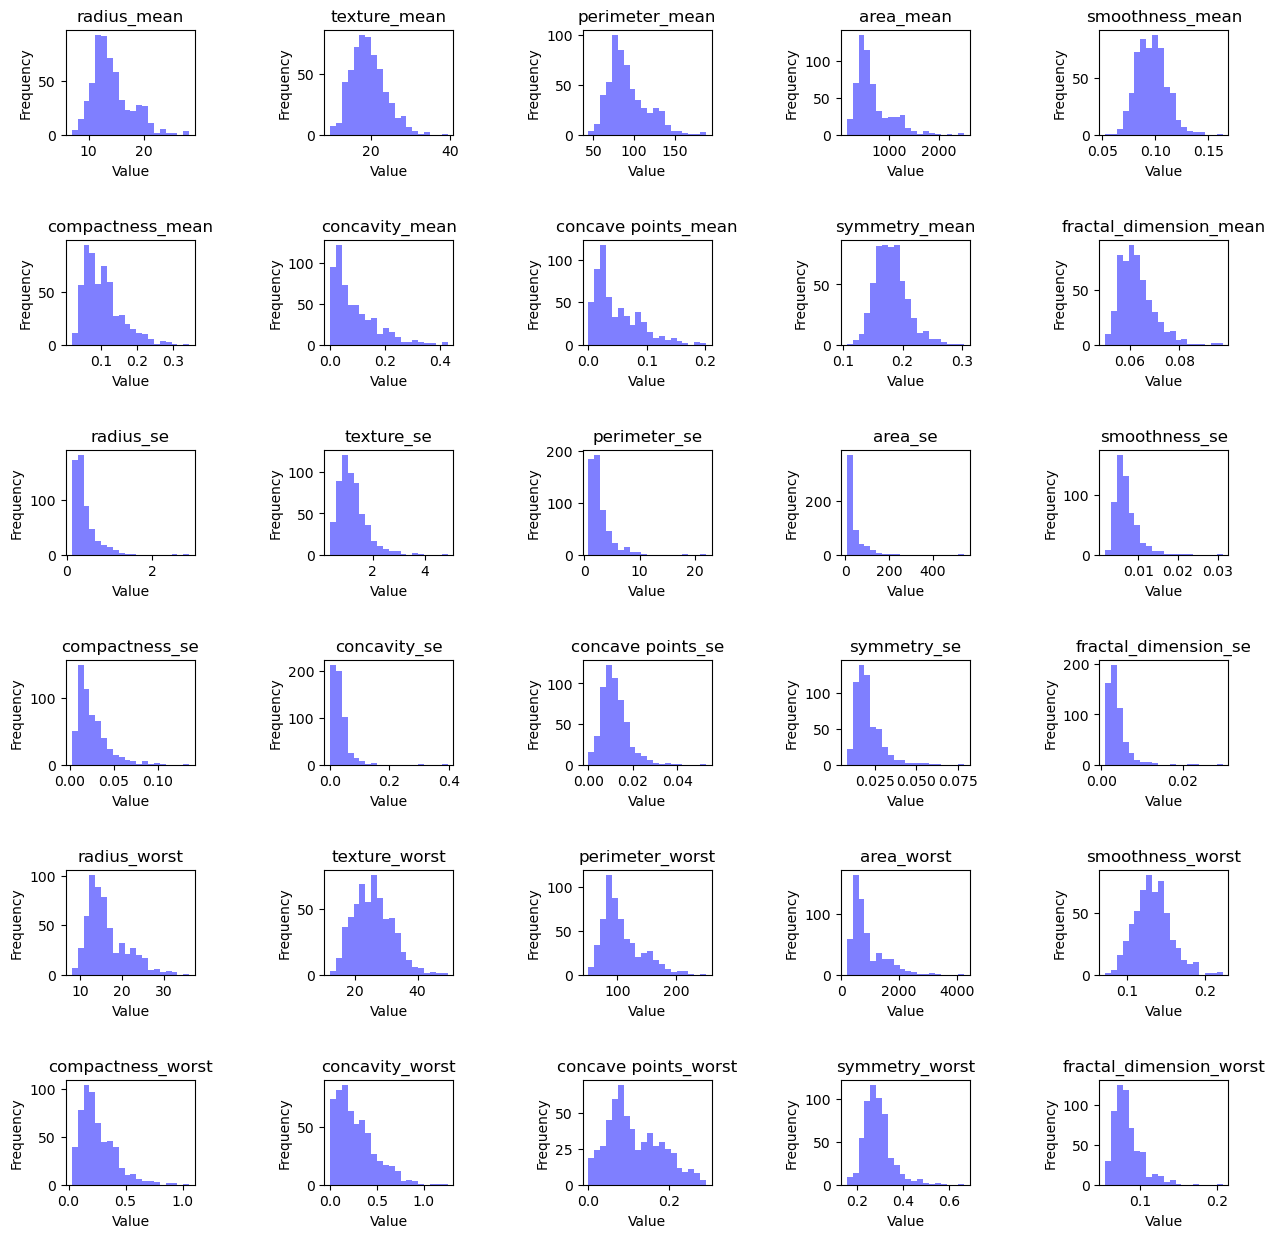

In [38]:
#3.1: Plot histograms for X (all 30 features) hint: use subplots and histograms
# make sure your subplots should be well spaced
# your source code below

# # Find out how many features we have
n_features = X.shape[1] # shape returns a tuple (n_rows, n_columns), in this case, (569, 30)
# I want this readable so we will put 5 features, (since we are dealing with 30 it could just as easily be 6), or 2 and 15, or 1  and 30, etc 
# or histograms, per row
#n_cols = 6
n_cols = 5 # n_cols is equal to 5

# I need to calculate how many row I will need for subplots
# n_rows = (n_features // n_cols) + 1
n_rows = (n_features + n_cols - 1) // n_cols  # n_rows is equal to the number of features plus the number of columns minus 1, divided by the number of columns

# I need to set the spacing between the subplots so they are readable. 
# Ill go 15 by 15 and I can go bigger later if necessary
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15)) # fig is equal to the figure, and the figure is equal to the number of rows, number of columns, and the size of the figure

# I need to add space between the subplots so they are readable
fig.subplots_adjust(hspace=1.0, wspace=1.0) # fig is equal to the figure, and the figure is equal to the space between the subplots

# For each individual feature, I want to draw a histogram
for i, column in enumerate(X.columns):
    # Figure out each histogram should go
    row = i // n_cols # row is equal to the index of the feature divided by the number of columns
    col = i % n_cols # col is equal to the index of the feature modulo the number of columns

    # Draw the histogram for each feature
    axes[row, col].hist(X[column], bins=20, color='blue', alpha=0.5) # axes is equal to the row and column we calculated above, and we are drawing a histogram with 20 bins, blue, and 50% transparency
    
    # Dynamically add title so we know which feature goes with which plot
    axes[row, col].set_title(column) # axes is equal to the row and column we calculated above, and we are setting the title to the name of the feature
    # Label the x and y axes
    axes[row, col].set_xlabel('Value') # axes is equal to the row and column we calculated above, and we are setting the x label to Value
    axes[row, col].set_ylabel('Frequency') # axes is equal to the row and column we calculated above, and we are setting the y label to Frequency

# If we have some empty space left in our grid (like if we have 27 features and are using a 5x6 grid)
# then we want to hide these empty plots
for j in range(i+1, n_rows*n_cols): # j is equal to the index of the feature plus 1, and we are looping through the number of rows times the number of columns
    axes[j // n_cols, j % n_cols].axis('off') # axes is equal to the index of the feature divided by the number of columns, and the index of the feature modulo the number of columns, and we are turning off the axis

# badabing badaboom, now I draw the plot and presto
plt.show()

# Ben's way, which is way better than mine
#X.hist(bins=50, figsize=(15,15))
#plt.show()

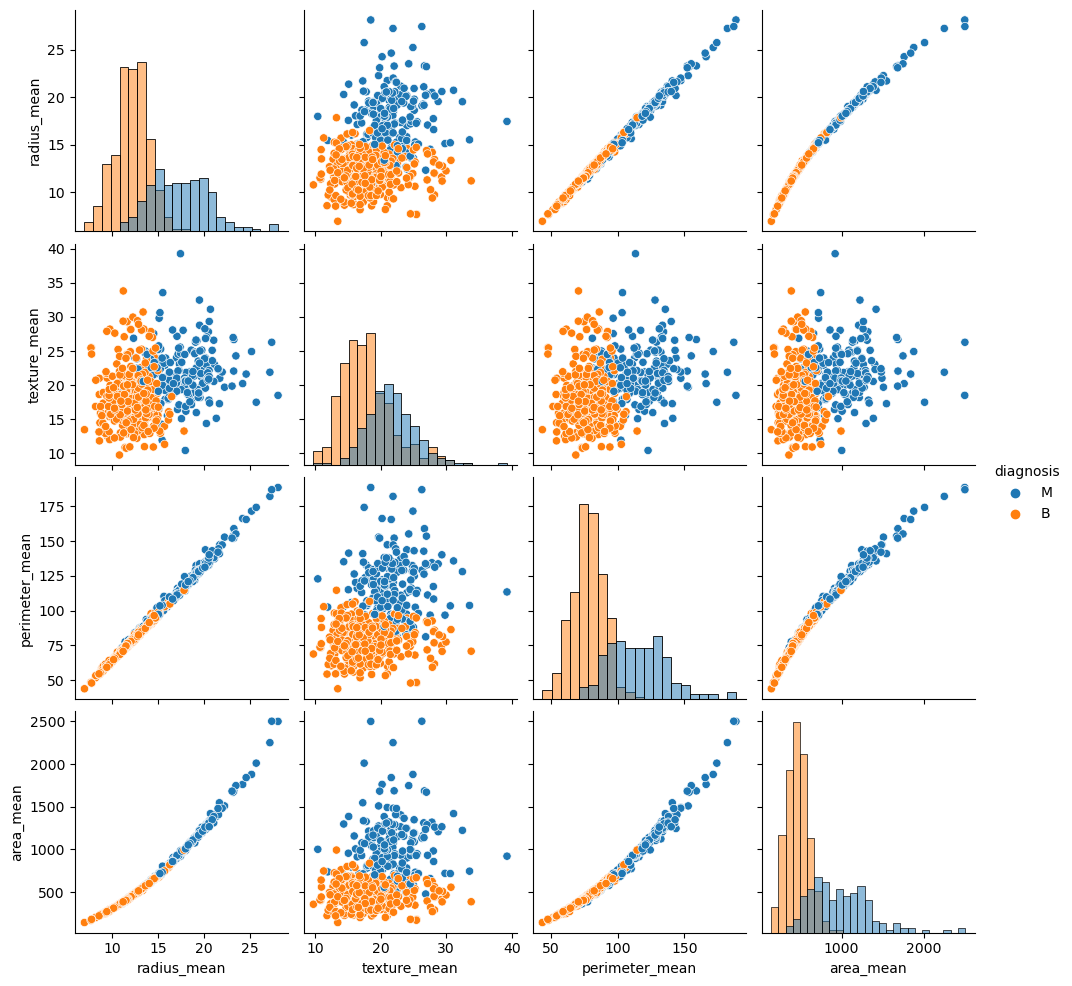

In [41]:
# 3.2: do pairplot for the first five columns in data matrix
# hint: using seaborn.pairplot, and use hue ='diagnosis'
# make sure you only extract the first five columns

# your source code below

# I want to make a subset of the dataframe that only has the first 5 columns
# subset_df is a dataframe that only has the first 5 columns
# df.iloc[:, :5] means I want all rows, and all columns up to but not including the 5th column
subset_df = df.iloc[:, :5]

#check to make sure it worked
#print(subset_df.head())

# With sns.pairplot, I can make a pairplot of the first 5 columns,
# giving the parameter hue='diagnosis' will color the points based on the diagnosis
# giving the parameter diag_kind='hist' will make the diagonal plots histograms
# I could have used the standard curve, but I think the histogram is more informative
# to change the color palette, I can give the parameter palette='husl' or any other color palettes like 'viridis', 'magma', etc
# to change the scatter plot to a histogram, I can give the parameter kind='hist', but I prefer the scatter plot
sns.pairplot(subset_df, hue='diagnosis', diag_kind='hist', kind='scatter')

# badabing badaboom show the plot
plt.show()
